In [1]:
import sys
sys.path.append('/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/methods')
from settings import *
import helpers
%matplotlib inline
config_file = "/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/supplement/config"
config_dict = helpers.process_config(config_file)

# Counts
counts_file = config_dict["ranges"]["core_counts"]

# Output
figures_dir = config_dict["saturation_curves"]["figures"] # this will be the same as for the saturation curves

# Strain Info
strain_info = pd.read_csv(strain_info_file, index_col=0)
over = config_dict['strains']['over'].split()
under = config_dict['strains']['under'].split()

/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/methods/helpers.py


In [2]:
# Getting tpm for core genes
tpm = pd.read_csv(counts_file, index_col=0)
to_keep = [c for c in tpm.columns if 'tpm' in c]
tpm = tpm[to_keep]
tpm.columns = [c.split("_tpm")[0] for c in tpm.columns]
tpm.head()

,HM01_UR,HM01_UTI,HM03_UR,HM03_UTI,HM06_UR,HM06_UTI,HM07_UR,HM07_UTI,HM14_UR,HM14_UTI,...,HM57_UR,HM57_UTI,HM60_UR,HM60_UTI,HM66_UR,HM66_UTI,HM68_UR,HM68_UTI,HM86_UR,HM86_UTI
b4182,8.971029,2.211994,11.142431,2.036462,14.444936,6.434127,13.297051,5.372516,3.555367,0.564257,...,12.588481,30.221942,4.678272,6.017731,11.570976,37.742298,6.541652,2.614712,7.146090,3.556760
b1960,16.058891,26.749659,28.936345,23.978875,23.991514,21.101427,33.711273,15.070987,26.796711,22.013818,...,14.451530,49.157352,10.621469,17.686153,12.474405,56.051328,37.416068,38.831258,17.590921,21.962696
b2866,68.468116,5.089277,32.553701,1.476516,38.376329,7.494810,19.966491,3.627936,27.112620,0.995052,...,35.483949,11.370272,23.514830,4.279495,46.308679,22.937853,7.387251,1.271271,34.417032,1.137694
b0328,71.045594,0.963176,54.949429,3.373696,13.674365,15.692517,64.518620,2.637142,47.312346,3.099841,...,34.975557,18.983051,83.436687,34.525777,96.365666,83.367481,7.029534,2.887768,29.375819,1.234622
b1660,48.983621,102.178606,101.211481,154.603907,101.371078,154.830814,109.383243,115.179934,85.748713,55.660832,...,22.257020,87.097092,26.934949,108.110443,34.729842,43.508050,92.122438,91.328809,35.885089,37.116817


In [3]:
over_colnames = ["{}_{}".format(st, cd) for cd in ["UR", "UTI"] for st in sorted(over)]
under_colnames = ["{}_{}".format(st, cd) for cd in ["UR", "UTI"] for st in sorted(under)]

In [4]:
def calculate_percent_expressed_above(df, expression_level):
    return round(df[df>expression_level].count()/df.count()*100,2)

In [5]:
g1 = calculate_percent_expressed_above(tpm, 1)
g10 = calculate_percent_expressed_above(tpm, 10)
g100 = calculate_percent_expressed_above(tpm, 100)
g1000 = calculate_percent_expressed_above(tpm, 1000)
proportions = pd.concat([g1, g10, g100, g1000], "columns",)
proportions.columns =   ["g1", "g10", "g100", "g1000"]
proportions_over = proportions.loc[over_colnames] 
proportions_uder = proportions.loc[under_colnames]

In [6]:
def plot_expression_ranges(df):
    r = range(df.shape[0])
    f = plt.figure(figsize=(16*1.5,8))
    for n,g in enumerate(df.columns):
        plt.bar(r, df[g], color = clrs[n], label = "TPM >{}".format(str(10**n)))
    labels = get_labels(df)
    plt.xticks(r, labels, rotation = 30, ha='right', fontsize=15);
    plt.yticks(fontsize=16)
    xmin, xmax = plt.xlim()
    plt.xlim(-1.5 + xmin, 1.5 + xmax)
    plt.ylim(0, 100)
    plt.ylabel("% genes expressed", fontsize = 18)
    plt.legend(fontsize=14)
    return f

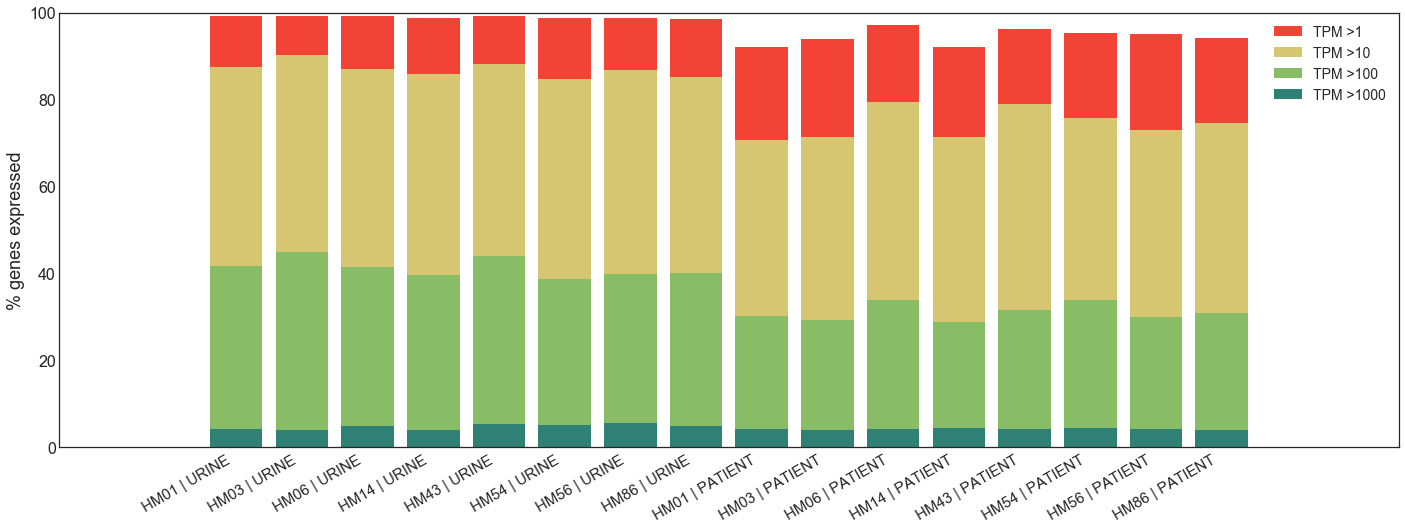

In [10]:
f = plot_expression_ranges(proportions_over)
fn = os.path.join(figures_dir, "Supplementary_Figure_4a.png")
f.savefig(fn, dpi=300, bbox_inches="tight")

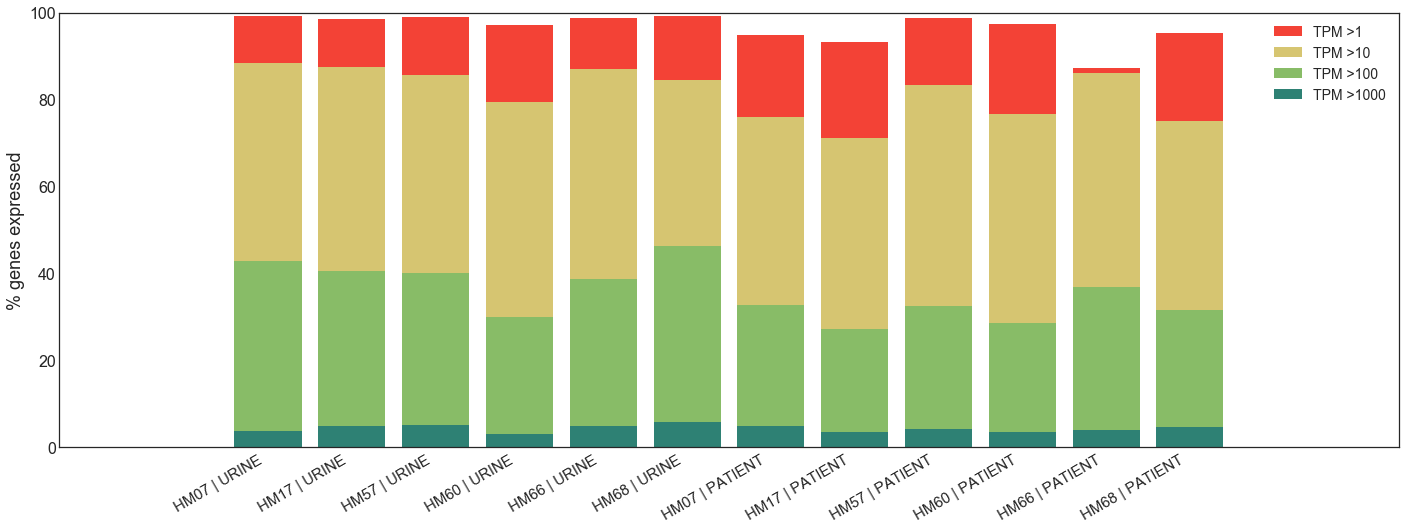

In [11]:
f = plot_expression_ranges(proportions_uder)
fn = os.path.join(figures_dir, "Supplementary_Figure_4b.png")
f.savefig(fn, dpi=300, bbox_inches="tight")